# Jonathan Halverson
# Saturday, March 26, 2016
# Bessel's correction

### Here we explain why N - 1 appears in the calculation for the variance of a sample. See https://en.wikipedia.org/wiki/Bessel%27s_correction

In [308]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['lines.markersize'] = 8

### Set the seeds then draw a large number of random integers and compute the mean and variance. This is the population.

In [309]:
random.seed(1234)
np.random.seed(1234)

population = np.random.random_integers(low=0, high=100, size=10000)
mu = population.mean()
s2 = population.var(ddof=0)
print mu, s2

50.1607 836.80167551


In [310]:
def var(v, mu, df=0):
    """Compute the variance of a list using the supplied average."""
    u = v - mu
    u *= u
    return u.sum() / (u.size - df)

### Compute the variance of the sample using three different methods:

In [311]:
var_with_population_mean = []
var_with_sample_mean = []
var_with_sample_mean_bessel = []
for _ in range(20):
    sample = np.array(random.sample(population, k=10))
    var_with_population_mean.append(var(sample, mu, 0))
    var_with_sample_mean.append(sample.var(ddof=0))
    var_with_sample_mean_bessel.append(sample.var(ddof=1))

### Plot the three variances and the population variance (horizontal line):

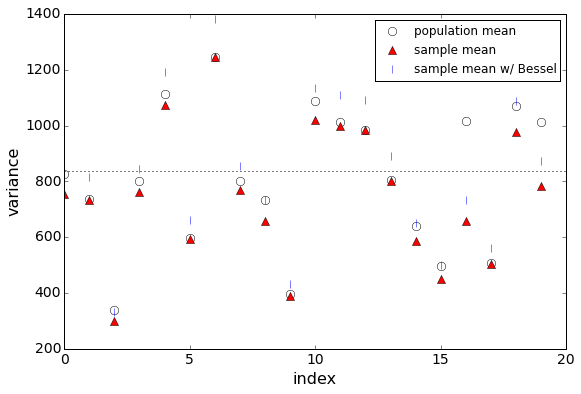

In [312]:
plt.figure(figsize=(9, 6))
plt.plot(var_with_population_mean, 'wo', label='population mean')
plt.plot(var_with_sample_mean, 'r^', label='sample mean')
plt.plot(var_with_sample_mean_bessel, 'b|', label='sample mean w/ Bessel')
plt.plot([0, 20], [s2, s2], 'k:')
plt.xlabel('index')
plt.ylabel('variance')
plt.legend(loc='upper right', fontsize=12)

### The dotted horizontal line in the figure above gives the variance of the population. We see that the value fluctuate about this line. The variance computed using the sample mean and Bessel correction is almost always higher than the variance computed using the population mean which is always larger than or equal to the variance computed using the sample mean without the Bessel correction.

In [313]:
print np.array(var_with_population_mean).mean() / s2
print np.array(var_with_sample_mean).mean() / s2
print np.array(var_with_sample_mean_bessel).mean() / s2

0.969220467915
0.899163472087
0.999070524541


### The calculations above show that the variance computed without the Bessel correction is less than the population value while when the correction is added, it is almost equal to the population variance.

In [314]:
print sum((np.array(var_with_sample_mean) - s2)**2)
print sum((np.array(var_with_sample_mean_bessel) - s2)**2)

1291888.96304
1419133.92948
